What should we do with the Data First ?

1. **Visualize** your Data

2. **describe()** : Statistical Description of Data

3. Use **Pandas Profiling** ( Interactive Report, Descriptive Statistics, Correlations, Distribution of Data )

4. Check for **Duplicates** : ( drop_duplicates() )

5. Beware of **Missing** Values : **isnull().sum()** ( **dropna()** or **fillna()** or **SimpleImputer** )


Communicate with Subject Matter Experts ( **SMEs** ) : Product Manager or Customer for whom you are Creating Model.

**Overfitting** : When your Model Captures **Patterns** in your Training Data too well.

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
bc = pd.DataFrame(df.data, columns = df.feature_names)
bc['target'] = pd.Series(df.target)
bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### Preventing Overfitting  

Lasso Regularization ( L1 ) :  Reduce or Eliminate Weights in our Model by adding Penalty 

Ridge Regularization ( L2 ) : Reduce Weights in our Model by adding Penalty 

In [3]:
from sklearn.model_selection import train_test_split
X, y = bc.iloc[:, :-1].values, bc.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 0, 
                                                    stratify = y) 

### Scale Features

We Learn **Scaling** Parameters while Training and Apply on Test Data 

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**L1** | LASSO Regularization in a Logistic Regression Model

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', 
                           C=0.1, 
                           solver='liblinear', 
                           multi_class='ovr')
model.fit(X_train, y_train)
print(f'Training Accuracy : {model.score(X_train, y_train)*100:.2f}%')
print(f'Test Accuracy : {model.score(X_test, y_test)*100:.2f}%')

Training Accuracy : 98.24%
Test Accuracy : 94.15%


**L2** | Ridge Regularization in a Logistic Regression Model 

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', 
                           C=0.1, 
                           solver='liblinear', 
                           multi_class='ovr')
model.fit(X_train, y_train)
print(f'Training Accuracy : {model.score(X_train, y_train)*100:.2f}%')
print(f'Test Accuracy : {model.score(X_test, y_test)*100:.2f}%')

Training Accuracy : 99.25%
Test Accuracy : 96.49%


**Data Leakage**

Information outside your Training Set enters your Model

How to **Detect** and **Prevent** Data Leakage

Any Feature surprisingly High Correlated with Target Variable 

In [7]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.corr()*100

,total_bill,tip,size
total_bill,100.000000,67.573411,59.831513
tip,67.573411,100.000000,48.929878
size,59.831513,48.929878,100.000000


### Imbalanced Data

Number of Observations per class are Disproportionately Distributed

In [8]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=100, 
                          n_features=2, 
                          n_informative=2, 
                          n_redundant=0, 
                          n_repeated=0, 
                          n_classes=3, 
                          n_clusters_per_class=1, 
                          weights=[0.01, 0.05, 0.94], 
                          class_sep=0.8, 
                          random_state=0)

df = pd.DataFrame(X)
df.columns = ['feature1','feature2']
df['target'] = y
df.head()

,feature1,feature2,target
0,1.166565,1.838346,2
1,0.068551,-0.084661,2
2,0.138849,-1.414872,2
3,2.456516,-1.368027,2
4,0.844214,0.228990,2


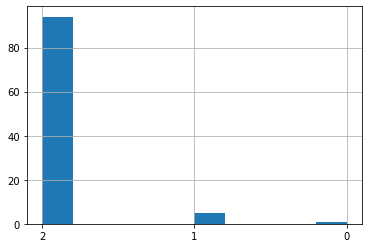

In [9]:
df['target'].astype(str).hist();

Applying **Over Sampling** Approach

In [10]:
from imblearn.over_sampling import RandomOverSampler
sample = RandomOverSampler(random_state=0)

In [11]:
X_resampled,y_resampled = sample.fit_resample(X,y)

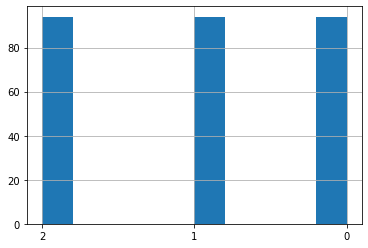

In [12]:
df = pd.DataFrame(y_resampled)
df[0].astype(str).hist();

Applying **Under Sampling** Approach

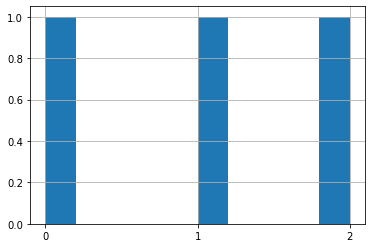

In [13]:
from imblearn.under_sampling import RandomUnderSampler
sample = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = sample.fit_resample(X,y)
df = pd.DataFrame(y_resampled)
df[0].astype(str).hist();

### Interpreting Coefficients with Multicollinearity

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()
iris = iris[iris['species'] != 'setosa']
iris['species'] = iris['species'].apply(lambda x : 1 if x == 'versicolor' else 0)

In [15]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

In [16]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

X = add_constant(X)
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                  0.9142
Time:                        20:49:04   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.6378     25.708      1.659      0.097      -7.748      93.024
sepal_length     2.465

**VIF** : Variance Inflation Factor
    
Extent to which we have Multicollinearity in our result

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [18]:
pd.DataFrame(list(zip(list(X.columns), vif)))

,0,1
0,const,125.170277
1,sepal_length,3.990113
2,sepal_width,1.721954
3,petal_length,7.252447
4,petal_width,3.948354


To Treat Multicollinearity we can **remove** Variable with **High VIF**

### Evaluating by Accuracy

In [19]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_repeated=0, 
                           n_classes=2, 
                           n_clusters_per_class=1, 
                           weights=[0.95, 0.05], 
                           class_sep=0.8, 
                           random_state=0)

In [20]:
help(make_classification)

Help on function make_classification in module sklearn.datasets._samples_generator:

make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    Generate a random n-class classification problem.
    
    This initially creates clusters of points normally distributed (std=1)
    about vertices of an ``n_informative``-dimensional hypercube with sides of
    length ``2*class_sep`` and assigns an equal number of clusters to each
    class. It introduces interdependence between these features and adds
    various types of further noise to the data.
    
    Without shuffling, ``X`` horizontally stacks features in the following
    order: the primary ``n_informative`` features, followed by ``n_redundant``
    linear combinations of the informative features, followed by ``n_repeated``
    duplicates, dr

In [21]:
df = pd.DataFrame(X)
df.columns = ['feature1', 'feature2']
df['target'] = y

In [22]:
df['prediction'] = 0

In [23]:
from sklearn.metrics import accuracy_score
print(f'Accuracy of Model : {accuracy_score(df["target"], df["prediction"])*100:.2f}%')

Accuracy of Model : 94.40%


### True Positive Rate ( Sensitivity )

In [24]:
positive = df[df['target'] == 1]
print(f'{accuracy_score(positive["target"], positive["prediction"])*100:.2f}%')

0.00%


### True Negative Rate ( Specificity )

In [25]:
negative = df[df['target'] == 0]
print(f'{accuracy_score(negative["target"], negative["prediction"])*100:.2f}%')

100.00%


In [26]:
import numpy as np
df['prediction'] = np.random.randint(0,2, df.shape[0])
df.head()

,feature1,feature2,target,prediction
0,-0.200228,-1.126880,0,0
1,-0.873630,0.999259,0,0
2,-0.722953,0.106167,0,0
3,-0.548422,1.903053,0,1
4,-1.254758,2.445131,0,1


### Confusion Matrix 

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df['target'], df['prediction'])
print(f'Confusion Matrix : \n{cm}')

Confusion Matrix : 
[[508 436]
 [ 26  30]]


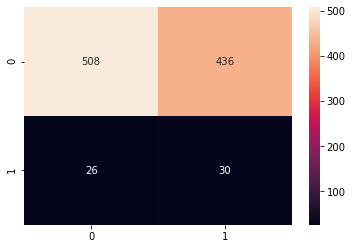

In [28]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g');

**Recall** : Ability to Classifier to find all Positive Sample

**Precision** : How Relevant our Result is 

**F1** Score

In [29]:
from sklearn.metrics import recall_score, precision_score, f1_score

print(f'Recall : {recall_score(df["target"], df["prediction"])*100:.2f}%')

print(f'Precision : {precision_score(df["target"], df["prediction"])*100:.2f}%')

print(f'F1 Score : {f1_score(df["target"], df["prediction"])*100:.2f}%')

Recall : 53.57%
Precision : 6.44%
F1 Score : 11.49%
